In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

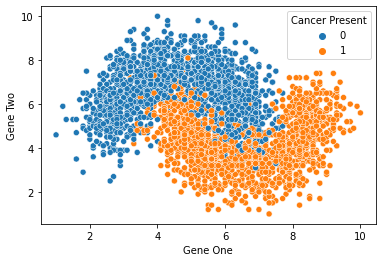

In [3]:
sns.scatterplot(x="Gene One", y="Gene Two", data=df, hue="Cancer Present")

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

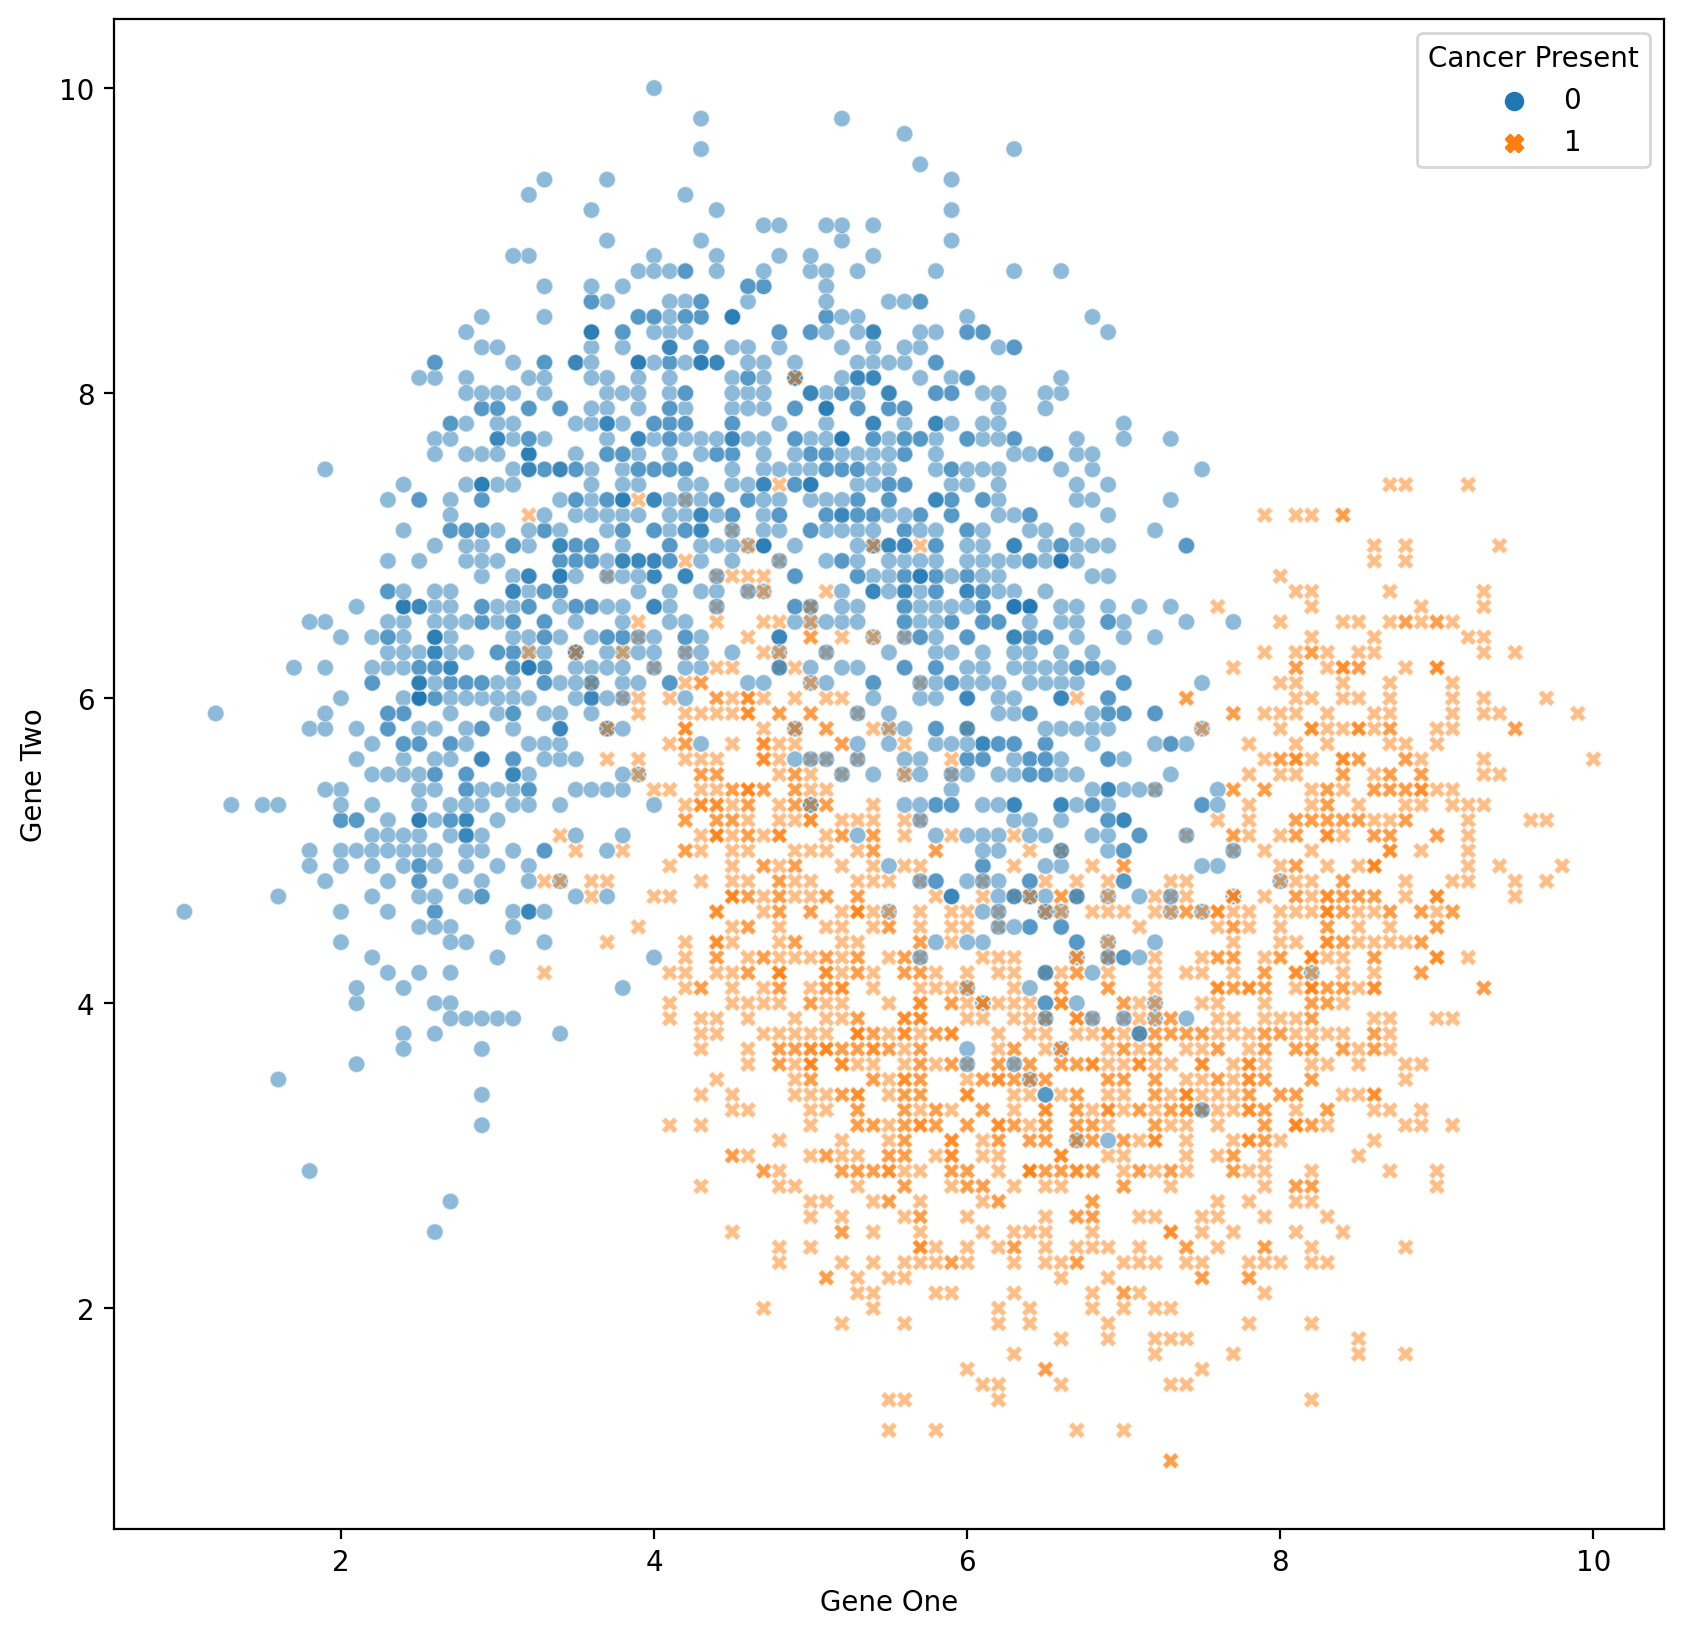

In [5]:
plt.figure(figsize=(10, 10), dpi=200)
sns.scatterplot(x="Gene One", y="Gene Two", data=df, hue="Cancer Present", alpha=0.5, style="Cancer Present")

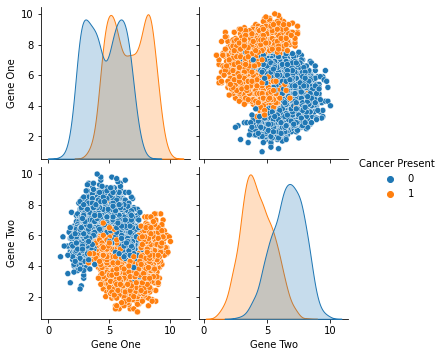

In [6]:
sns.pairplot(df, hue="Cancer Present")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [8]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [9]:
X = df.drop(["Cancer Present"], axis=1)
y = df['Cancer Present']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred = knn.predict(scaled_X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.9011111111111111

In [16]:
print(confusion_matrix(y_test, y_pred))

[[426  44]
 [ 45 385]]


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [18]:
test_error_rates = []

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    y_pred = knn.predict(scaled_X_test)
    test_error_rates.append(1 - accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Test Error Rate')

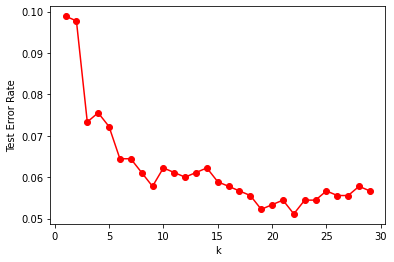

In [19]:
plt.plot(range(1, 30), test_error_rates, marker='o', color='red')
plt.xlabel('k')
plt.ylabel('Test Error Rate')

In [20]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [21]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [22]:
operations = [('scaler', scaler), ('knn', knn)]

In [23]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
k_values = list(range(1, 20))

In [26]:
param_grid = dict(knn__n_neighbors=k_values)

In [27]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [28]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [29]:
full_cv_classifier.best_params_

{'knn__n_neighbors': 16}

In [30]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [31]:
y_pred = full_cv_classifier.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.9422222222222222

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [34]:
confusion_matrix(y_test, y_pred)

array([[449,  21],
       [ 31, 399]], dtype=int64)

In [35]:
new_patient = [[3.8, 6.4]]

In [36]:
full_cv_classifier.predict(new_patient)

array([0], dtype=int64)

In [37]:
full_cv_classifier.predict_proba(new_patient)

array([[1., 0.]])